In [13]:
import random
# import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import argparse

import pdb

from model import *
from metrics import *
from dataset import *
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import *
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras import backend as K
from functools import wraps

In [6]:
# Config
tf.set_random_seed(777)

# os.environ["CUDA_VISIBLE_DEVICES"]=device
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

In [7]:
# Parameters
test_name = "0x0x-test-x"
device = "0"
model_type = "U"
data = "chd"
option = "train"
image_size = 256
batch_size = 5#16
epochs = 50
learning_rate = 0.0001
num_classes = 4
base = 32
scale = 2
which_target = 1

In [8]:
# Setting base directory 
base_dir = './input/chd'
x_train_dir = os.path.join(base_dir, 'x_train', 'class')
x_valid_dir = os.path.join(base_dir, 'x_valid', 'class')
x_test_dir = os.path.join(base_dir, 'x_test', 'class')
y_train_dir = os.path.join(base_dir, 'y_train', 'class')
y_valid_dir = os.path.join(base_dir, 'y_valid', 'class')
y_test_dir = os.path.join(base_dir, 'y_test', 'class')

In [9]:
x_folders = os.listdir(x_train_dir)
x_folders = sorted(x_folders)
y_folders = os.listdir(y_train_dir)
y_folders = sorted(y_folders)

In [10]:
print(x_folders[0], y_folders[0])

dia_002_000.jpg dia_002_000.jpg


In [12]:
# from PIL import Image
# print('Pillow Version:', PIL.__version__)

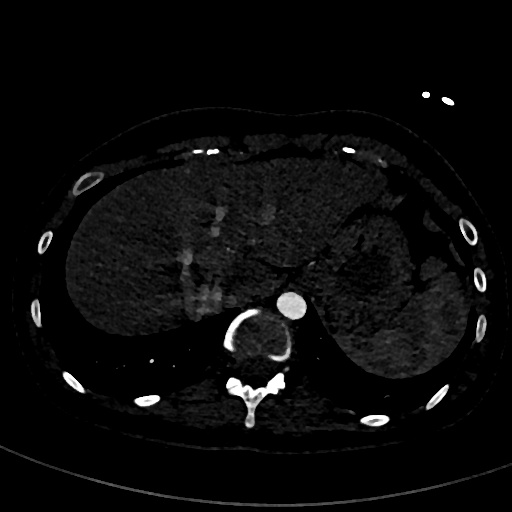

In [14]:
image = Image.open(os.path.join(x_train_dir, x_folders[0]))
image

In [15]:
x_sample = np.asarray(image)
x_sample.shape

(512, 512)

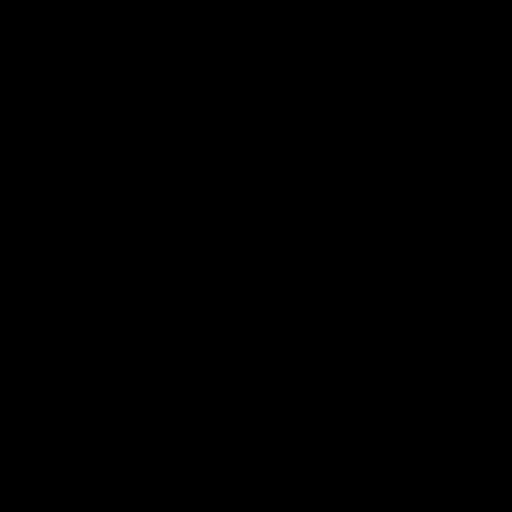

In [16]:
image = Image.open(os.path.join(y_train_dir, y_folders[0]))
image

In [17]:
image = Image.open(os.path.join(y_train_dir, y_folders[0]))
y_sample = np.asarray(image)
y_sample.shape


# need to preprocess Y (to have labels)





(512, 512)

In [ ]:
# model.compile(loss=dice_categorical_crossentropy,
#                   optimizer=keras.optimizers.Adam(lr=learning_rate, decay=0.0),
#                   metrics=[dice_coef, dice_coef_1, dice_coef_2, dice_coef_3, 
#                            adv_dice_coef])

In [19]:
model = load_model(filepath="./save/"+str(test_name)+"_"+data+".hdf5",
               custom_objects={'dice_categorical_crossentropy': dice_categorical_crossentropy,
                               'dice_coef': dice_coef,
                               'dice_coef_1': dice_coef_1,
                               'dice_coef_2': dice_coef_2,
                               'dice_coef_3': dice_coef_3,
                               'Scale': scale})










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
model

In [22]:
x_true = np.arange(0,10,0.1)
m_true = 2.5
b_true = 1.0
y_true = m_true*x_true + b_true


In [23]:
def func(params, *args):
    x = args[0]
    y = args[1]
    m, b = params
    y_model = m*x+b
    error = y-y_model
    return sum(error**2)

In [30]:
a = model.weights
len(a)

76

In [26]:
from keras.losses import categorical_crossentropy
def func2(params, *args): #우리가 구하려는건 model의 weights가 아니라 x_adv
    params = np.clip(params, 0, 1)
    x = args[0]
    y = args[1]
    model = args[2]
    params = model.weights
    y_hat = model.predict(x)
    loss = categorical_crossentropy(y, y_hat, from_logits=True, label_smoothing=0)
    return loss

In [24]:
initial_values = np.array([1.0, 0.0])
initial_values

array([1., 0.])

In [28]:
mybounds = [(None,2), (None,None)]
max_iter = 100

In [25]:
initial_image = np.zeros(np.shape(x_sample))

(512, 512)

In [29]:
fmin_l_bfgs_b(func2, x0=initial_image, args=(x_sample,y_sample), approx_grad=True, maxiter = max_iter)

(array([2.49999998, 1.00000008]),
 2.358084131095103e-13,
 {'grad': array([1.80123476e-10, 2.06901222e-10]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 27,
  'nit': 6,
  'warnflag': 0})

In [ ]:
#       # optimization function
#       adv_x, _, __ = fmin_l_bfgs_b(
#           lbfgs_objective,
#           oimgs.flatten().astype(float),
#           args=(self, targets, oimgs, CONST),
#           bounds=clip_bound,
#           maxiter=self.max_iterations,
#           iprint=0)


In [ ]:
#     model.fit_generator(
#         train_gen,
#         epochs=epochs,
#         shuffle=True,
#         steps_per_epoch=56751/batch_size,
#         validation_data=valid_gen,
#         validation_steps=19316/batch_size,
#         callbacks=[checkpointer, csv_logger, reduce_lr],
#         verbose=1)